<a href="https://colab.research.google.com/github/adznn7B/Projetos/blob/main/Projetos_Pessoais_Previs%C3%A3o_de_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importando as bibliotecas ✈

In [31]:
#Bibliotecas para algoritmo de Machine Learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Bibliotecas para a métrica de avaliação
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report

#Algoritmo
from sklearn.linear_model import LogisticRegression

#Seletor de modelo para transformar em treino e teste
from sklearn.model_selection import train_test_split

###Iniciando a análise exploratória dos dados ⭐

In [2]:
#Criando o DataFrame do Pandas
df = pd.read_csv('/content/diabetes.csv')

In [4]:
#Plotando o data frame na tela
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Descobrindo quantidade de linhas e colunas
df.shape

(768, 9)

In [11]:
#Resumindo o data frame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
#Descobrindo como está separada a coluna de target
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

###Iniciando o algoritmo de machine learning (Logistic Regression) ✅

In [32]:
#Escolha das colunas

X = df.iloc[:,:-1].values #Todas as colunas exceto a ultima que valida se a pessoa está com diabetes ou não.
y = df.iloc[:,-1].values #Fica apenas a coluna com a informação se a pessoa está com diabetes ou não.

In [33]:
#Separa o modelo em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [39]:
#Treinando o modelo

classificador = LogisticRegression()
classificador.fit(X_train, y_train)

y_pred = classificador.predict(X_test)
y_proba = classificador.predict_proba(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


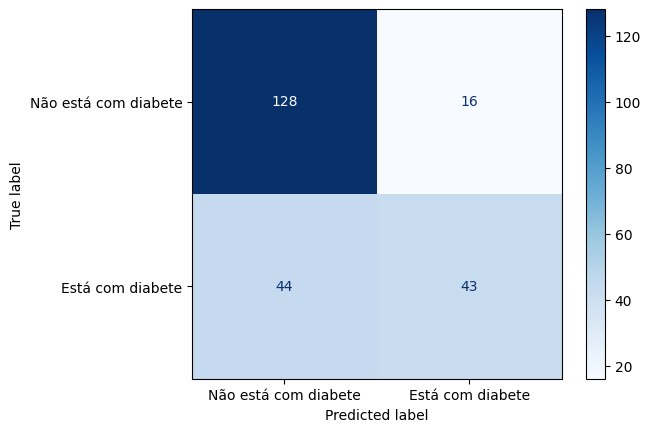

In [40]:
#Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

#Gráfico para mostrar a matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = plt.cm.Blues,
                                        normalize = None, display_labels = ['Não está com diabete', 'Está com diabete'])


In [41]:
#Mostra as % de cada tipo

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       172
           1       0.49      0.73      0.59        59

    accuracy                           0.74       231
   macro avg       0.69      0.74      0.70       231
weighted avg       0.79      0.74      0.75       231



In [42]:
#Mostra a % da acuracidade de acerto e a probabilidade de estar com diabete
print(accuracy_score(y_test, y_pred))

0.7402597402597403


In [43]:
#Mostra a probabilidade em % sobre a pessoa estar com diabete
print(y_proba)

[[0.45623808 0.54376192]
 [0.78946248 0.21053752]
 [0.52367569 0.47632431]
 [0.9182269  0.0817731 ]
 [0.90747357 0.09252643]
 [0.95973562 0.04026438]
 [0.9244358  0.0755642 ]
 [0.68900085 0.31099915]
 [0.94105928 0.05894072]
 [0.64443444 0.35556556]
 [0.93639798 0.06360202]
 [0.78526402 0.21473598]
 [0.07618612 0.92381388]
 [0.6803165  0.3196835 ]
 [0.89357473 0.10642527]
 [0.30588833 0.69411167]
 [0.25580773 0.74419227]
 [0.95983161 0.04016839]
 [0.90692233 0.09307767]
 [0.07530885 0.92469115]
 [0.69302876 0.30697124]
 [0.5361026  0.4638974 ]
 [0.64366693 0.35633307]
 [0.79236817 0.20763183]
 [0.843948   0.156052  ]
 [0.32010387 0.67989613]
 [0.67951918 0.32048082]
 [0.98839615 0.01160385]
 [0.30199825 0.69800175]
 [0.16098708 0.83901292]
 [0.79182259 0.20817741]
 [0.96401352 0.03598648]
 [0.93672994 0.06327006]
 [0.84477253 0.15522747]
 [0.55641981 0.44358019]
 [0.89103209 0.10896791]
 [0.66651894 0.33348106]
 [0.75156066 0.24843934]
 [0.22517094 0.77482906]
 [0.94628718 0.05371282]


In [44]:
#Inserindo a probabilidade de diabete de cada pessoa na base de dados

probabilidade = pd.DataFrame(y_proba)
df = pd.merge(df.reset_index(), probabilidade, left_index=True, right_index=True)

df.head()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,0,1
0,0,6,148,72,35,0,33.6,0.627,50,1,0.456238,0.543762
1,1,1,85,66,29,0,26.6,0.351,31,0,0.789462,0.210538
2,2,8,183,64,0,0,23.3,0.672,32,1,0.523676,0.476324
3,3,1,89,66,23,94,28.1,0.167,21,0,0.918227,0.081773
4,4,0,137,40,35,168,43.1,2.288,33,1,0.907474,0.092526


In [45]:
#Renomeando as colunas de probabilidade

df = df.rename({0: '% Não'}, axis = 1)
df = df.rename({1: '% Sim'}, axis = 1)

df.head()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,% Não,% Sim
0,0,6,148,72,35,0,33.6,0.627,50,1,0.456238,0.543762
1,1,1,85,66,29,0,26.6,0.351,31,0,0.789462,0.210538
2,2,8,183,64,0,0,23.3,0.672,32,1,0.523676,0.476324
3,3,1,89,66,23,94,28.1,0.167,21,0,0.918227,0.081773
4,4,0,137,40,35,168,43.1,2.288,33,1,0.907474,0.092526
